# Guided example and challenge

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
# Define outcome ('partner' – boolean) and predictors
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# 90% of data is training
X_train, y_train = X[:offset], y[:offset]

# 10% is test
X_test, y_test = X[offset:], y[offset:]

__Since we're now working with a binary outcome, we've switched to a classifier. Now our loss function can't be the residuals. Our options are "deviance", or "exponential". Deviance is used for logistic regression, and we'll try that here.__

In [4]:
# 500 iterations, use 2-level-deep trees
# Set model's loss function to deviance
params = {'n_estimators': 500, 'max_depth': 2, 'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

# Get predictions from both training and test sets
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Print accuracy using crosstab
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training accuracy:\n'
    '% Type I errors: {}\n'
    '% Type II errors: {}\n\n'
    'Test accuracy:\n'
    '% Type I errors: {}\n'
    '% Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training accuracy:
% Type I errors: 0.04650845608292417
% Type II errors: 0.17607746863066012

Test accuracy:
% Type I errors: 0.06257668711656442
% Type II errors: 0.18527607361963191


__Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface. But they aren't quite a black box. We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.__

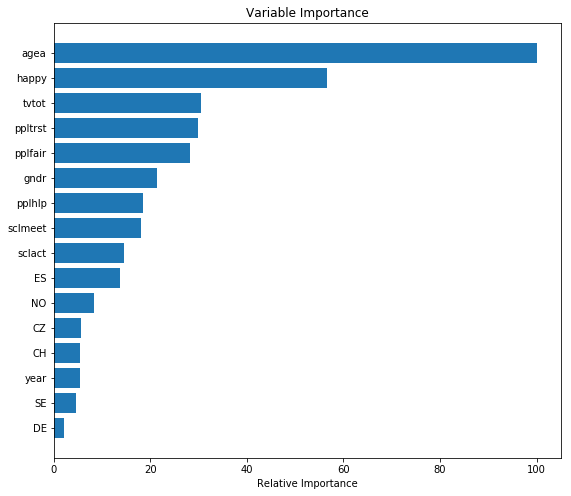

In [5]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

__It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.__

## DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. 

See how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use:

1. Creating new features
2. Applying more overfitting-prevention strategies like subsampling and/or shrinkage
3. More iterations
4. Trying a different loss function
5. Changing the structure of the weak learner – allow more leaves in the tree, etc.

In [6]:
new_df = df.copy()
new_df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


(array([548., 599., 504., 610., 695., 742., 759., 756., 663., 676., 513.,
        499., 266., 194.,  83.,  33.,   4.,   2.,   0.,   1.]),
 array([ 15.  ,  19.95,  24.9 ,  29.85,  34.8 ,  39.75,  44.7 ,  49.65,
         54.6 ,  59.55,  64.5 ,  69.45,  74.4 ,  79.35,  84.3 ,  89.25,
         94.2 ,  99.15, 104.1 , 109.05, 114.  ]),
 <a list of 20 Patch objects>)

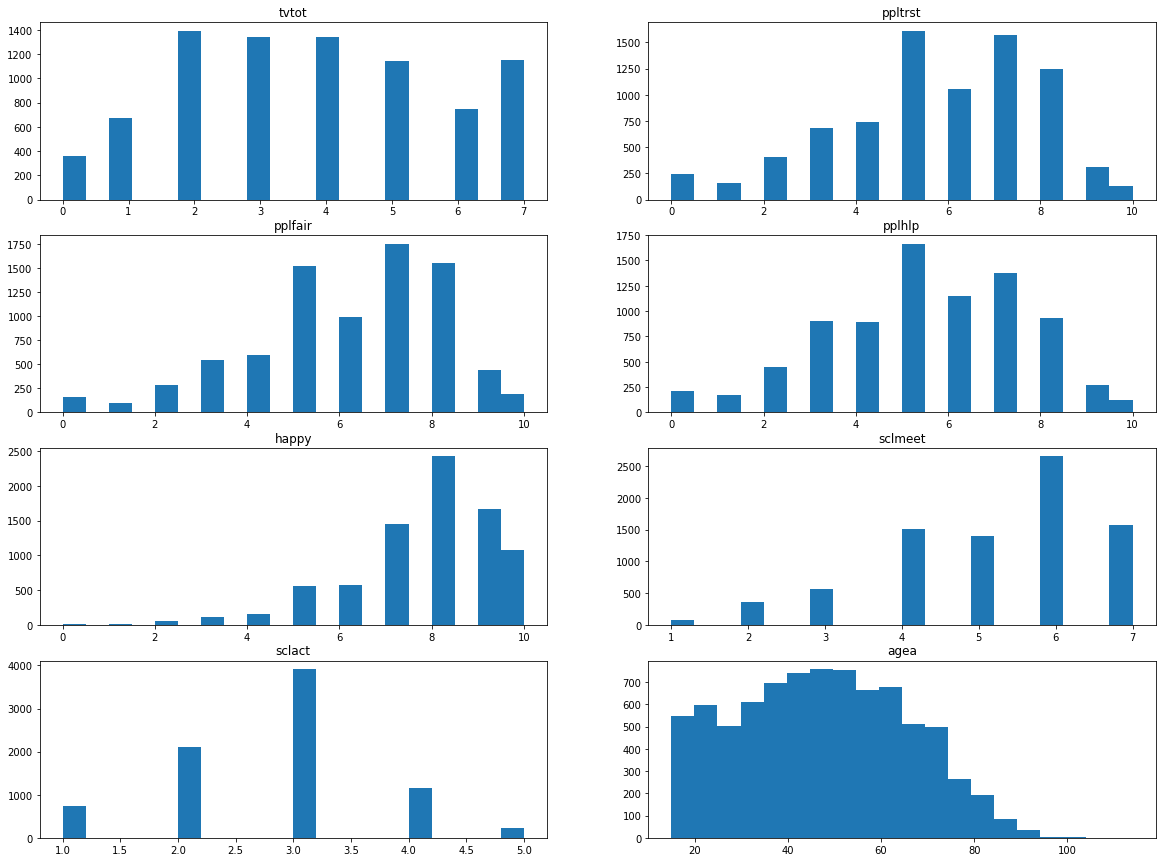

In [7]:
new_df = new_df.drop('idno', 1)

plt.figure(figsize=(20,15))

plt.subplot(4, 2, 1)
plt.title('tvtot')
plt.hist(new_df['tvtot'], bins=20)

plt.subplot(4, 2, 2)
plt.title('ppltrst')
plt.hist(new_df['ppltrst'], bins=20)

plt.subplot(4, 2, 3)
plt.title('pplfair')
plt.hist(new_df['pplfair'], bins=20)

plt.subplot(4, 2, 4)
plt.title('pplhlp')
plt.hist(new_df['pplhlp'], bins=20)

plt.subplot(4, 2, 5)
plt.title('happy')
plt.hist(new_df['happy'], bins=20)

plt.subplot(4, 2, 6)
plt.title('sclmeet')
plt.hist(new_df['sclmeet'], bins=20)

plt.subplot(4, 2, 7)
plt.title('sclact')
plt.hist(new_df['sclact'], bins=20)

plt.subplot(4, 2, 8)
plt.title('agea')
plt.hist(new_df['agea'], bins=20)

tvtot – outliers: [0.0, 7.0] , mean: 3.8185835276789004 , median: 4.0
ppltrst – outliers: [0.0, 10.0] , mean: 5.57493555910151 , median: 6.0
pplfair – outliers: [1.0, 10.0] , mean: 6.005155271879219 , median: 6.0
pplhlp – outliers: [0.0, 10.0] , mean: 5.321468025039892 , median: 5.0
happy – outliers: [4.0, 10.0] , mean: 7.708481649687001 , median: 8.0
sclmeet – outliers: [1.0, 7.0] , mean: 5.215907696084448 , median: 6.0
sclact – outliers: [1.0, 4.0] , mean: 2.7559837977169512 , median: 3.0
agea – outliers: [15.0, 103.0] , mean: 47.26218239842887 , median: 47.0


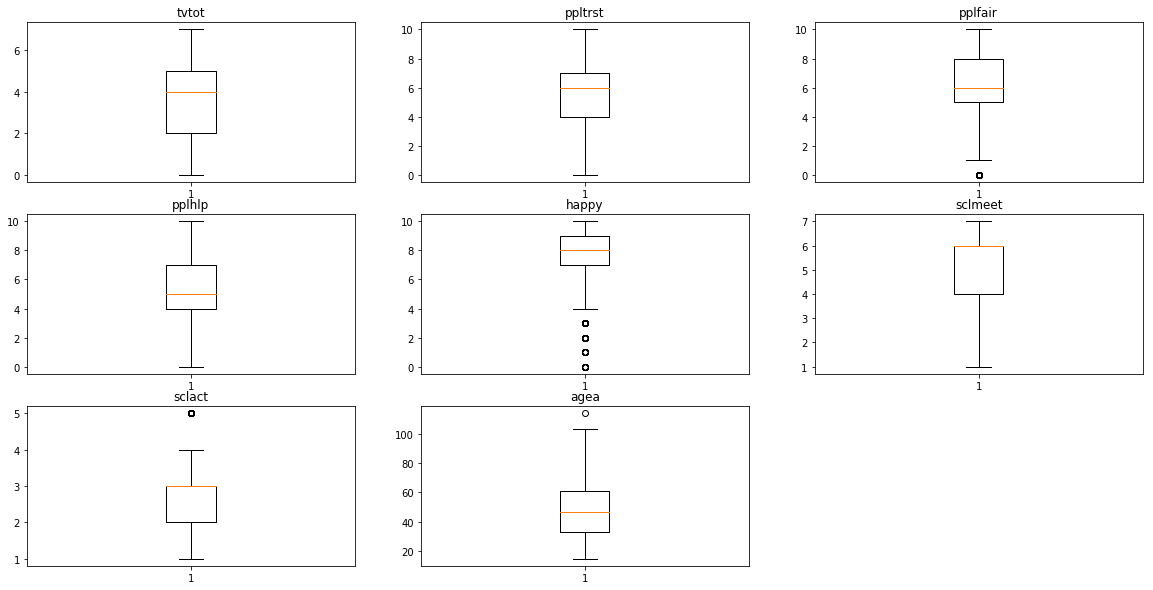

In [8]:
all_features = list(new_df.columns)
all_features.remove('cntry')
all_features.remove('year')
all_features.remove('gndr')
all_features.remove('partner')

plt.figure(figsize=(20, 10))

for idx, feature in enumerate(all_features):
    plt.subplot(3, 3, idx + 1)
    plt.title(feature)
    the_boxplot = plt.boxplot(new_df[feature])
    the_outliers = [item.get_ydata()[1] for item in the_boxplot['whiskers']]
    the_mean = new_df[feature].mean()
    the_median = new_df[feature].median()
    print(feature, '– outliers:', the_outliers, ', mean:', the_mean, ', median:', the_median)
    
plt.show()

In [9]:
# Make categories of variables
# Make sure variables are NOT greatly skewed (e.g. ratings for the recipes data)
# Normal distribution is not a criteria for Gradient Boosting Model
# e.g.: group people into unhappy, moderately happy, very happy

In [10]:
# Define outcome ('partner' – boolean) and predictors
y = new_df['partner'] - 1
X = new_df.loc[:, ~new_df.columns.isin(['partner', 'cntry', 'idno'])]

# Make 'country' into dummies.
X = pd.concat([X, pd.get_dummies(new_df['cntry'])], axis=1)

# STRATEGY #1: ADD MORE FEATURES
# df['agea > med'] = [1 if x else 0 for x in df['agea'] > df['agea'].median()]
# df['happy > med'] = [1 if x else 0 for x in df['happy'] > df['happy'].median()]
# df['ppltrst > med'] = [1 if x else 0 for x in df['ppltrst'] > df['ppltrst'].median()]
new_df['scndnvn'] = [1 if x in ['DK', 'NO', 'SE', 'FI'] else 0 for x in new_df['cntry']]
new_df['ppl'] = (new_df['ppltrst'] + new_df['pplfair'] + new_df['pplhlp']) / 3
new_df['scl'] = (new_df['sclmeet'] + new_df['sclact']) / 2

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# 90% of data is training
X_train, y_train = X[:offset], y[:offset]

# 10% is test
X_test, y_test = X[offset:], y[offset:]

new_df.head()

,cntry,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,scndnvn,ppl,scl
0,CH,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,0,6.000000,4.5
1,CH,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,0,5.666667,2.5
2,CH,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,0,8.000000,4.5
3,CH,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,0,6.333333,4.0
4,CH,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,0,6.000000,4.5


In [11]:
from sklearn import preprocessing

all_countries = new_df['cntry']
names = list(new_df.columns)
names.remove('cntry')
df = pd.DataFrame(preprocessing.normalize(new_df[names]), columns=names)
new_df['cntry'] = all_countries

new_df.head()

,cntry,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,scndnvn,ppl,scl
0,CH,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,0,6.000000,4.5
1,CH,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,0,5.666667,2.5
2,CH,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,0,8.000000,4.5
3,CH,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,0,6.333333,4.0
4,CH,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,0,6.000000,4.5


In [14]:
from sklearn.model_selection import GridSearchCV
# find good # of estimators – more is not always better
# huge datasets will not work great with small learning rates – will take too long
# should be safer to have higher subsample rate – but sometimes some datasets will do fine with small subsample (0.01 is too low; > 0.6)

# TODO: GridSearchCV (similar to cross-validation) – sklearn – optimizes parameters
def gbm_param_selection(X, y, nfolds):
    # STRATEGY #2: SUBSAMPLE TO AVOID OVERFITTING
    # STRATEGY #3: USE MORE ITERATIONS
    # STRATEGY #4: DIFFERENT LOSS FCN (vs. 'deviance')
    # STRATEGY #5: CHANGE WEAK LEARNERS (ADD MORE LEAVES)
    # 500 -> 1000 iterations, use 2-level-deep trees
    estims = range(10, 110, 25)
    depths = range(1, 5)
    losses = ['deviance', 'exponential']
    subs = [0.1, 1]
    l_rates = [0.001, 0.5]
    
    param_grid = {'n_estimators': estims, 'max_depth': depths, 'loss': losses, 'subsample': subs, 'learning_rate': l_rates}
    grid_search = GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params = gbm_param_selection(X_train, y_train, 5)
print('Best params:', best_params)
clf = ensemble.GradientBoostingClassifier(**best_params)
clf.fit(X_train, y_train)

# Get predictions from both training and test sets
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Print accuracy using crosstab
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training accuracy:\n'
    '% Type I errors: {}\n'
    '% Type II errors: {}\n\n'
    'Test accuracy:\n'
    '% Type I errors: {}\n'
    '% Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Best params: {'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 1, 'n_estimators': 10, 'subsample': 0.1}
Training accuracy:
% Type I errors: 0.034233496999454445
% Type II errors: 0.22176759410801963

Test accuracy:
% Type I errors: 0.051533742331288344
% Type II errors: 0.21226993865030674


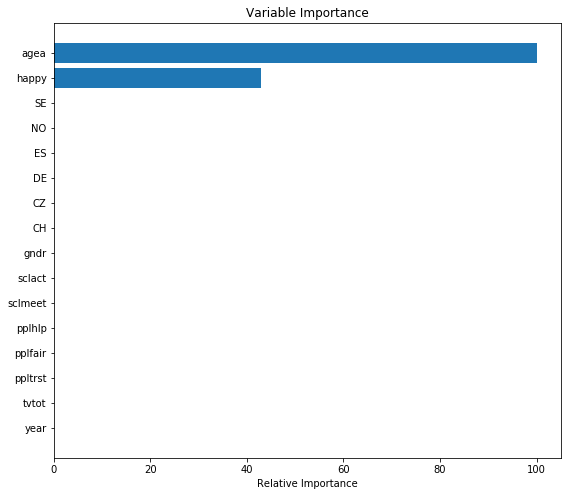

In [13]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()